# A Simple Example of Analyzing COVID-19 Data

## Data source

The data is downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

## Load data from S3

In [4]:
import pandas as pd

df = pd.read_csv('s3://social-data-analytics-cloud-ai/data.csv') # load the data from s3
df.head() #show the top 5 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## View data

In [5]:
df.shape #show the number of rows and columns 

(61900, 12)

In [6]:
df.info() #show the data types and number of null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [7]:
df.isnull().sum() #show the number of rows containing null value

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [8]:
df['countriesAndTerritories'] #select a column 

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
61895       Zimbabwe
61896       Zimbabwe
61897       Zimbabwe
61898       Zimbabwe
61899       Zimbabwe
Name: countriesAndTerritories, Length: 61900, dtype: object

In [9]:
df.sort_values(by='deaths') #sort data by a column

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
52925,25/05/2020,25,5,2020,-372,-1918,Spain,ES,ESP,46937060.0,Europe,16.255812
31909,24/08/2020,24,8,2020,237,-443,Kyrgyzstan,KG,KGZ,6415851.0,Asia,45.964284
29271,25/06/2020,25,6,2020,577,-31,Italy,IT,ITA,60359546.0,Europe,6.042126
31304,06/08/2020,6,8,2020,218,-12,Kosovo,XK,XKX,1798506.0,Europe,178.259066
28207,03/10/2020,3,10,2020,466,-5,Ireland,IE,IRL,4904240.0,Europe,97.711368
...,...,...,...,...,...,...,...,...,...,...,...,...
59241,18/04/2020,18,4,2020,30833,3770,United_States_of_America,US,USA,329064917.0,America,128.910430
16906,07/09/2020,7,9,2020,-8261,3800,Ecuador,EC,ECU,17373657.0,America,11.598019
44907,24/07/2020,24,7,2020,4546,3887,Peru,PE,PER,32510462.0,America,168.093582
44886,14/08/2020,14,8,2020,9441,3935,Peru,PE,PER,32510462.0,America,309.143561


In [11]:
df[0:5] #slice by rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [12]:
df[df['deaths']>5] # select rows by values 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61754,13/08/2020,13,8,2020,75,18,Zimbabwe,ZW,ZWE,14645473.0,Africa,13.751690
61760,07/08/2020,7,8,2020,56,13,Zimbabwe,ZW,ZWE,14645473.0,Africa,15.506498
61763,04/08/2020,4,8,2020,154,10,Zimbabwe,ZW,ZWE,14645473.0,Africa,16.127851
61766,01/08/2020,1,8,2020,77,14,Zimbabwe,ZW,ZWE,14645473.0,Africa,11.942257


## Manage data

In [13]:
df['date'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y') #change the data type to date with specific format
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10


In [14]:
df = df.rename(columns={"popData2019": "pop", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000": "cum","countriesAndTerritories":"country" }) #rename columns
df.head()

,dateRep,day,month,year,cases,deaths,country,geoId,countryterritoryCode,pop,continentExp,cum,date
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10


In [15]:
df = df.dropna() #drop null values
df.isnull().sum()

dateRep                 0
day                     0
month                   0
year                    0
cases                   0
deaths                  0
country                 0
geoId                   0
countryterritoryCode    0
pop                     0
continentExp            0
cum                     0
date                    0
dtype: int64

In [16]:
df = df[df['deaths']>=0] #drop rows where the death number is negative

df = df[df['cases']>=0] #drop rows where the case number is negative

df

,dateRep,day,month,year,cases,deaths,country,geoId,countryterritoryCode,pop,continentExp,cum,date
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61882,07/04/2020,7,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796,2020-04-07
61883,06/04/2020,6,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796,2020-04-06
61884,05/04/2020,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.047796,2020-04-05
61885,04/04/2020,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.054624,2020-04-04


In [17]:
df = df[['country','cases','deaths','pop','cum','date']] # select specific columns 
df

,country,cases,deaths,pop,cum,date
0,Afghanistan,746,6,38041757.0,9.013779,2020-12-14
1,Afghanistan,298,9,38041757.0,7.052776,2020-12-13
2,Afghanistan,113,11,38041757.0,6.868768,2020-12-12
3,Afghanistan,63,10,38041757.0,7.134266,2020-12-11
4,Afghanistan,202,16,38041757.0,6.968658,2020-12-10
...,...,...,...,...,...,...
61882,Zimbabwe,0,0,14645473.0,0.047796,2020-04-07
61883,Zimbabwe,0,0,14645473.0,0.047796,2020-04-06
61884,Zimbabwe,0,0,14645473.0,0.047796,2020-04-05
61885,Zimbabwe,1,0,14645473.0,0.054624,2020-04-04


In [75]:
df.to_csv('clean_data.csv') #store the cleaned data to local computer

## Analyze data

In [19]:
df.describe() #statistical summary of the data

,cases,deaths,pop,cum,date
count,58735.000000,58735.000000,5.873500e+04,58735.000000,58735
mean,1217.109781,27.417604,4.139225e+07,66.479719,2020-07-24 04:26:21.094747648
min,0.000000,0.000000,8.150000e+02,-147.419587,2020-01-13 00:00:00
25%,0.000000,0.000000,1.293120e+06,0.762010,2020-05-17 00:00:00
50%,20.000000,0.000000,7.813207e+06,6.696730,2020-07-27 00:00:00
75%,313.000000,5.000000,2.860872e+07,52.609423,2020-10-05 00:00:00
max,234633.000000,4928.000000,1.433784e+09,1900.836210,2020-12-14 00:00:00
std,6953.972034,133.406103,1.540391e+08,162.683623,NaN


In [20]:
df['country'].value_counts() #show the count of unqiue values 

country
Switzerland         337
Canada              337
Japan               337
South_Korea         337
Netherlands         337
                   ... 
Comoros             214
Lesotho             201
Solomon_Islands      47
Marshall_Islands     34
Vanuatu              21
Name: count, Length: 211, dtype: int64

### The Sum of Case Numbers per Day

In [87]:
sum_cases_by_date = df.groupby('date')['cases'].sum() #aggregate the total case number per day
sum_cases_by_date 

date
2020-01-13         1
2020-01-14         1
2020-01-15         1
2020-01-16         0
2020-01-17         5
               ...  
2020-12-10    675940
2020-12-11    693051
2020-12-12    656816
2020-12-13    626249
2020-12-14    540392
Name: cases, Length: 337, dtype: int64

<Axes: xlabel='date'>

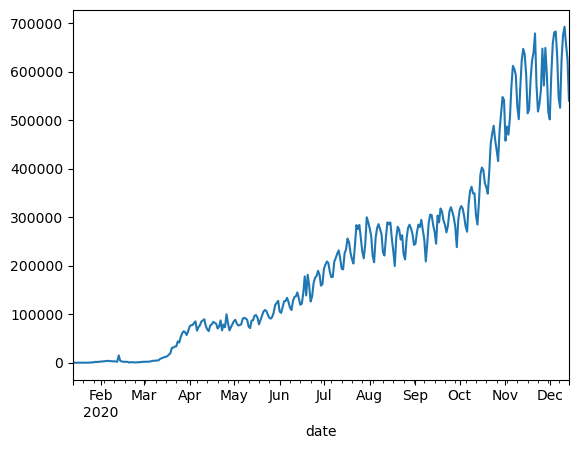

In [52]:
sum_cases_by_date.plot() #use a line chart to show the result

### The Top 10 Countries with the Highest Deaths

In [77]:
sum_deaths_by_country = df.groupby('country')['deaths'].sum() # calculate the total deaths per day
sum_deaths_by_country.nlargest(10) #show the top 10 countries with the largest deaths 

country
United_States_of_America    299177
Brazil                      181402
India                       143355
Mexico                      113953
Italy                        64504
United_Kingdom               64170
France                       57804
Iran                         52196
Spain                        49134
Russia                       46941
Name: deaths, dtype: int64

<Axes: xlabel='country'>

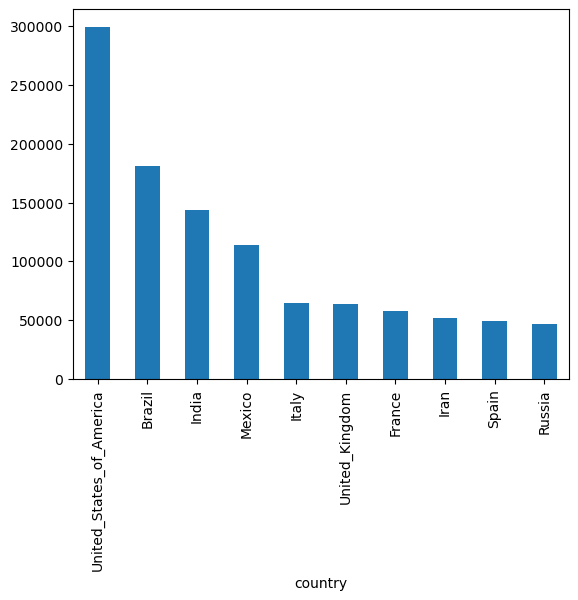

In [76]:
sum_deaths_by_country.nlargest(10).plot.bar() # use a bar chart to show the results

### USA data

In [88]:
USA_data = df[df['country']=='United_States_of_America'] #select the USA data

<Axes: xlabel='date', ylabel='deaths'>

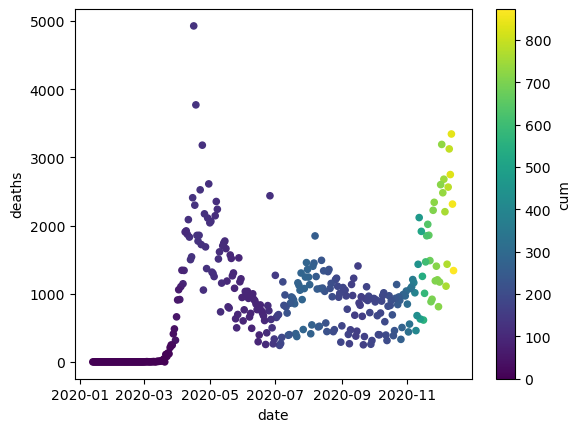

In [89]:
USA_data.plot.scatter(x='date',y='deaths',c='cum') #show how the deaths change over time